In [1]:
# import emcee
import matplotlib.pyplot as plt
import scipy.stats
from scipy import interpolate
from scipy import integrate
import numpy as np
import corner
%matplotlib inline
np.random.seed(1)

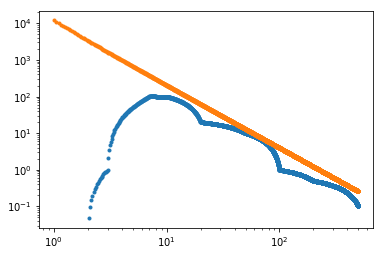

In [73]:
def power_law(x, index=-1.7):
    return 10000*(x-0.1)**index

def aeff():
    a = [0, 0.0, 0.00, 0.00, 1 , 100.5,  100, 20,  10, 1, 0.5,  0.1]
    e = [0, 0.01, 1, 2,  3, 7,    10, 20,  50, 100, 200, 500]
    return interpolate.interp1d(e, a, kind=1)

x = np.linspace(1, 500, 10000)
f = aeff()
plt.plot(x, f(x), '.')
plt.plot(x, power_law(x), '.')
plt.yscale('log')
plt.xscale('log')

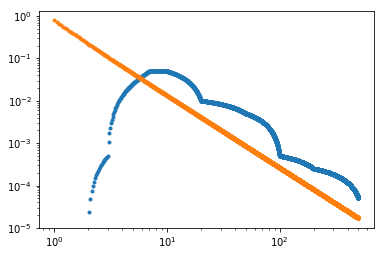

In [81]:
area_f = integrate.simps(f(x), x)
area_e = integrate.simps(power_law(x), x)

p1 = f(x)/area_f
p2 = power_law(x)/area_e
c = np.convolve(p1, p2, mode='same')

plt.plot(x, f(x)/area_f, '.')
plt.plot(x, power_law(x)/area_e, '.')
plt.yscale('log')
plt.xscale('log')

In [85]:
from irf import power_law
import astropy.units as u

In [96]:
crab = power_law.CrabSpectrum()
samples = crab.draw_energy_distribution(e_min=10*u.GeV, e_max=100*u.TeV, shape=10000)

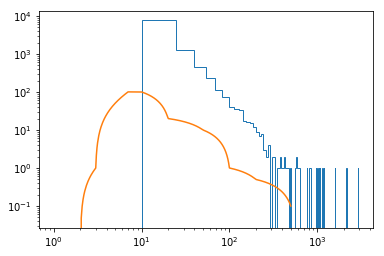

In [106]:
plt.hist(samples.to('GeV').value, bins=200, histtype='step')
plt.plot(x, f(x))
plt.yscale('log')
plt.xscale('log')